# QR Code and Barcode Dataset Exploration

This notebook explores the QR code and barcode datasets.

In [3]:
!brew install zbar

⠋ JSON API formula.jws.json ------------------------ Downloading  32.1MB/-------
⠋ JSON API cask.jws.json    ------------------------ Downloading  15.3MB/-------⠋ JSON API formula.jws.json ------------------------ Downloading  32.1MB/-------
⠋ JSON API cask.jws.json    ------------------------ Downloading  15.3MB/-------⠙ JSON API formula.jws.json ------------------------ Downloading  32.1MB/-------
⠙ JSON API cask.jws.json    ------------------------ Downloading  15.3MB/-------⠙ JSON API formula.jws.json ------------------------ Downloading 204.8KB/-------
⠙ JSON API cask.jws.json    ------------------------ Downloading 262.1KB/-------⠚ JSON API formula.jws.json ------------------------ Downloading 204.8KB/-------
⠚ JSON API cask.jws.json    ------------------------ Downloading 262.1KB/-------⠚ JSON API formula.jws.json ------------------------ Downloading 311.3KB/-------
⠚ JSON API cask.jws.json    ------------------------ Downloading 393.2KB/-------⠞ JSON API formula.jws.json ------

In [4]:
import sys
from pathlib import Path

# Add parent directory to path
sys.path.insert(0, str(Path.cwd().parent))

import cv2
import numpy as np
import matplotlib.pyplot as plt
from src.utils.file_io import get_image_files, get_image_annotation_pairs, read_yolo_annotation, read_image
from src.utils.visualization import yolo_to_bbox, draw_bounding_box
from src.utils.config import get_project_root

%matplotlib inline

## 1. QR Code Dataset Exploration

In [5]:
# Get project root and QR data directory
project_root = get_project_root()
qr_dir = project_root / "qr_data"

# Get all QR code images
qr_images = get_image_files(qr_dir)
print(f"Total QR code images: {len(qr_images)}")

# Show first few filenames
print("\nSample filenames:")
for img in qr_images[:10]:
    print(f"  {img.name}")

Total QR code images: 10000

Sample filenames:
  1002-v1.png
  1002-v2.png
  1002-v3.png
  1002-v4.png
  1011-v1.png
  1011-v2.png
  1011-v3.png
  1011-v4.png
  1015-v1.png
  1015-v2.png


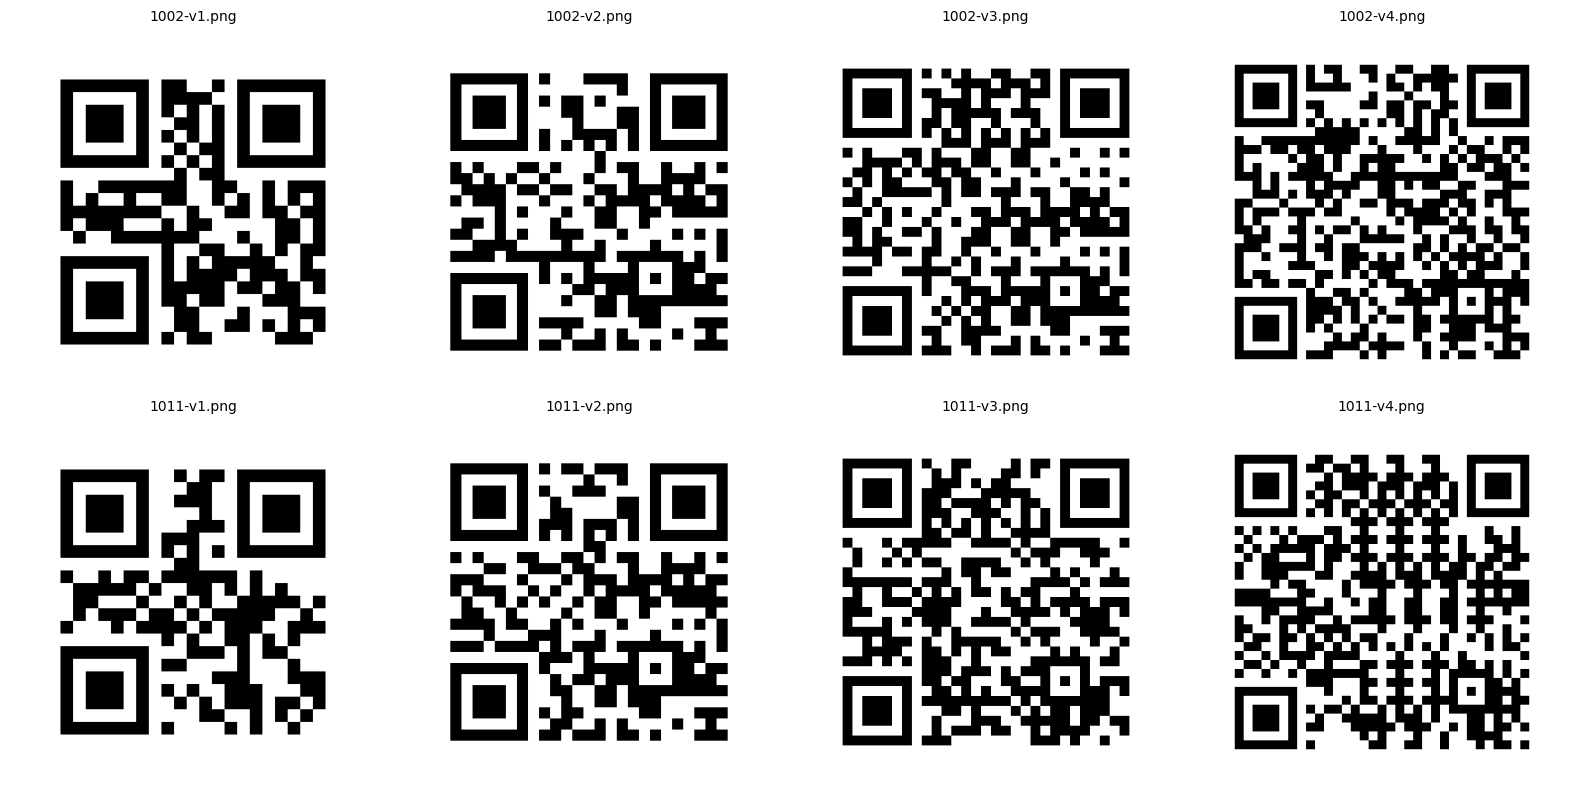

In [6]:
# Display sample QR codes
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, img_path in enumerate(qr_images[:8]):
    img = read_image(str(img_path))
    if img is not None:
        # Convert BGR to RGB for matplotlib
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i].imshow(img_rgb)
        axes[i].set_title(img_path.name, fontsize=10)
        axes[i].axis('off')

plt.tight_layout()
plt.show()

## 2. Barcode Dataset Exploration

In [7]:
# Get barcode data directories
barcode_dir_0 = project_root / "barcode_data" / "0"
barcode_dir_1 = project_root / "barcode_data" / "1"

# Get image-annotation pairs
pairs_0 = get_image_annotation_pairs(barcode_dir_0)
pairs_1 = get_image_annotation_pairs(barcode_dir_1)

print(f"Class 0 (single/no barcode): {len(pairs_0)} images")
print(f"Class 1 (multiple barcodes): {len(pairs_1)} images")
print(f"Total: {len(pairs_0) + len(pairs_1)} annotated images")

Class 0 (single/no barcode): 326 images
Class 1 (multiple barcodes): 708 images
Total: 1034 annotated images


In [8]:
# Analyze annotations in Class 0
print("Class 0 annotation analysis:")
annotation_counts_0 = []
for img_path, ann_path in pairs_0:
    annotations = read_yolo_annotation(str(ann_path))
    annotation_counts_0.append(len(annotations))

print(f"  Min annotations per image: {min(annotation_counts_0)}")
print(f"  Max annotations per image: {max(annotation_counts_0)}")
print(f"  Avg annotations per image: {np.mean(annotation_counts_0):.2f}")

Class 0 annotation analysis:
  Min annotations per image: 1
  Max annotations per image: 2
  Avg annotations per image: 1.02


In [9]:
# Analyze annotations in Class 1
print("Class 1 annotation analysis:")
annotation_counts_1 = []
for img_path, ann_path in pairs_1:
    annotations = read_yolo_annotation(str(ann_path))
    annotation_counts_1.append(len(annotations))

print(f"  Min annotations per image: {min(annotation_counts_1)}")
print(f"  Max annotations per image: {max(annotation_counts_1)}")
print(f"  Avg annotations per image: {np.mean(annotation_counts_1):.2f}")

Class 1 annotation analysis:
  Min annotations per image: 1
  Max annotations per image: 2
  Avg annotations per image: 1.16


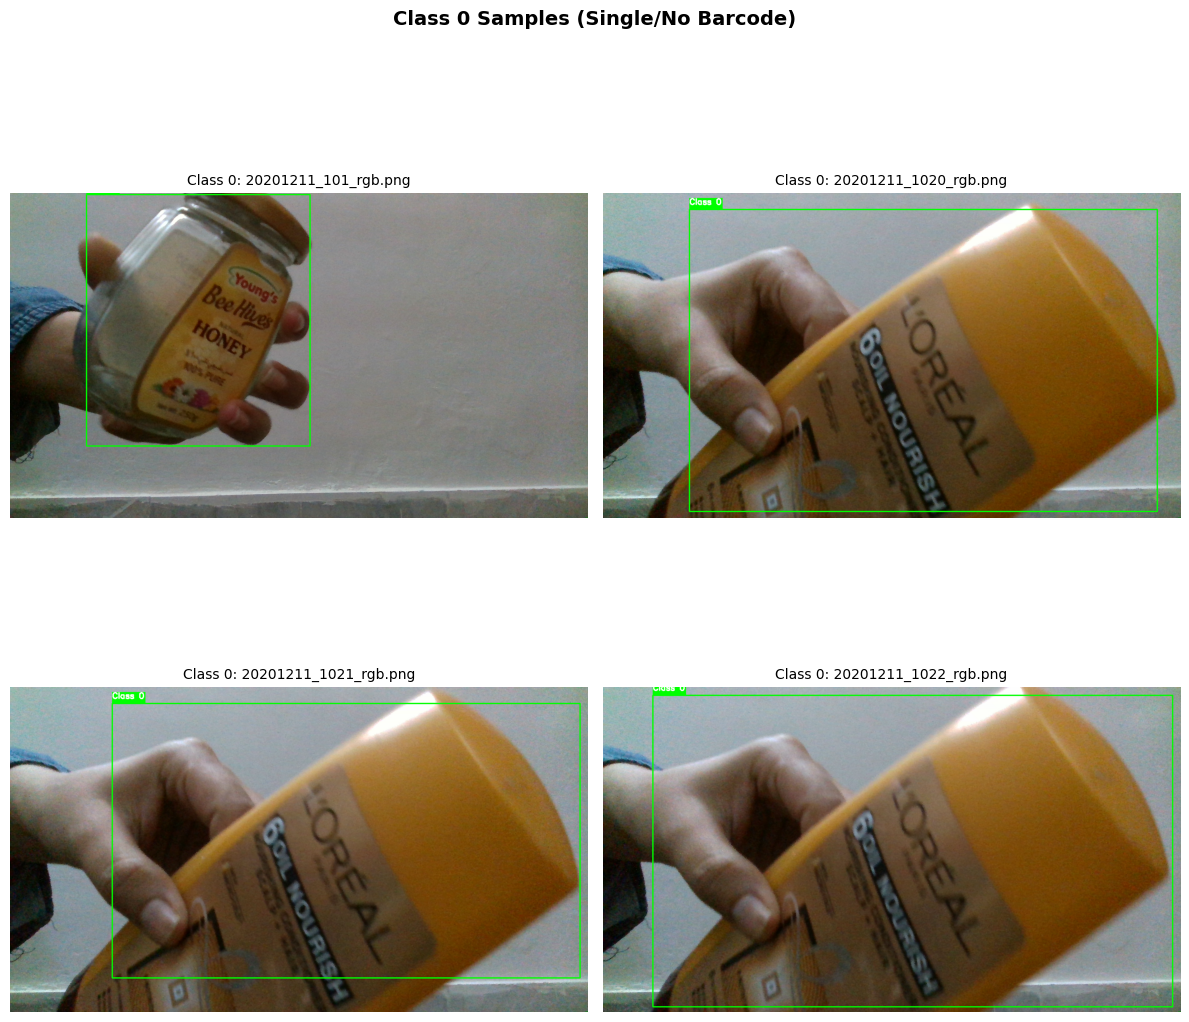

In [10]:
# Visualize sample barcodes with annotations
def visualize_annotated_image(img_path, ann_path):
    """Visualize an image with its annotations."""
    img = read_image(str(img_path))
    if img is None:
        return None
    
    annotations = read_yolo_annotation(str(ann_path))
    height, width = img.shape[:2]
    
    # Draw each annotation
    for class_id, center_x, center_y, w, h in annotations:
        bbox = yolo_to_bbox((center_x, center_y, w, h), width, height)
        color = (0, 255, 0) if class_id == 0 else (255, 0, 0)
        label = f"Class {class_id}"
        img = draw_bounding_box(img, bbox, label, color)
    
    return img

# Display samples from Class 0
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()

for i, (img_path, ann_path) in enumerate(pairs_0[:4]):
    img = visualize_annotated_image(img_path, ann_path)
    if img is not None:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i].imshow(img_rgb)
        axes[i].set_title(f"Class 0: {img_path.name}", fontsize=10)
        axes[i].axis('off')

plt.suptitle("Class 0 Samples (Single/No Barcode)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

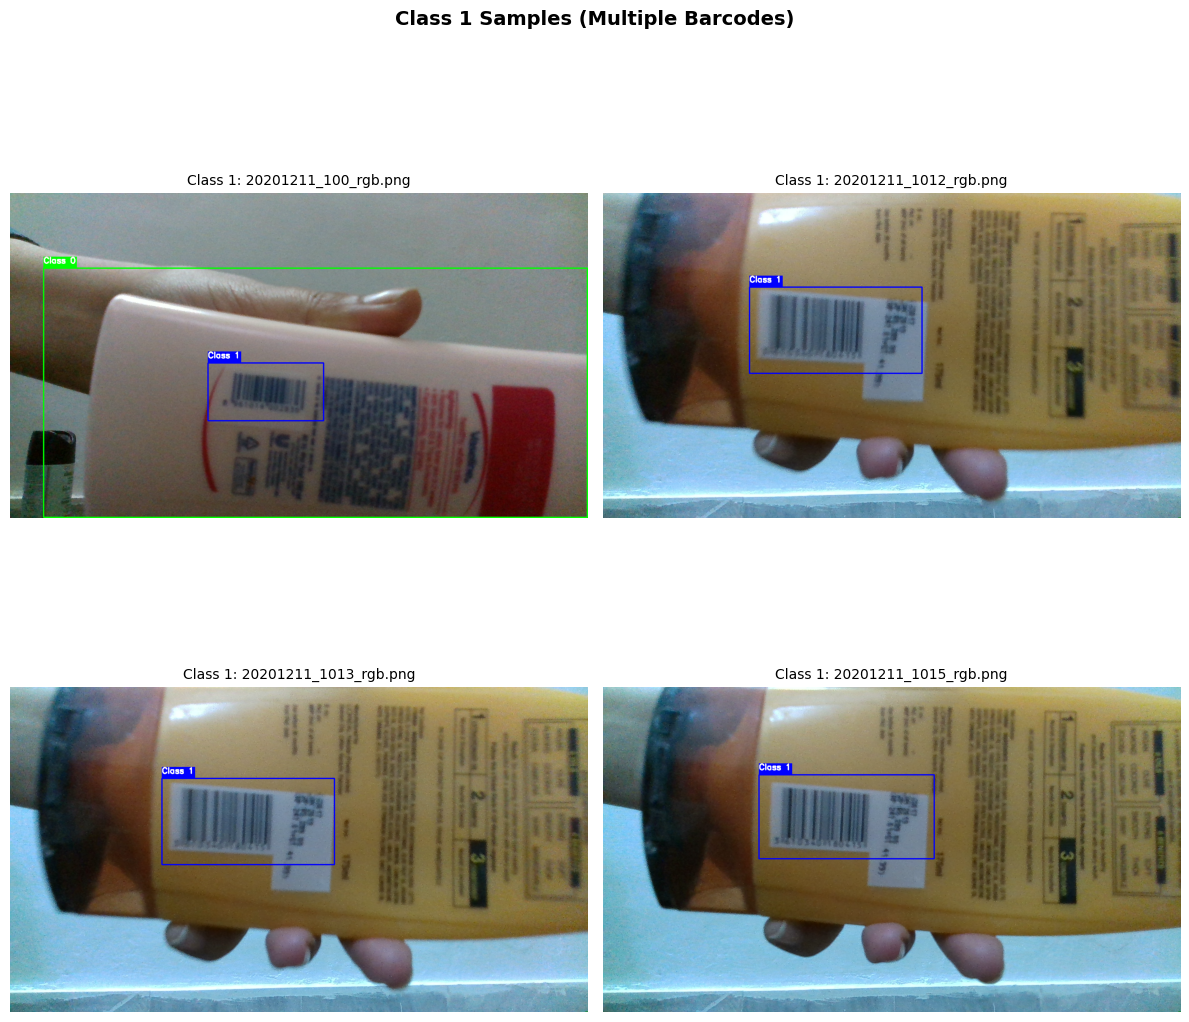

In [11]:
# Display samples from Class 1
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()

for i, (img_path, ann_path) in enumerate(pairs_1[:4]):
    img = visualize_annotated_image(img_path, ann_path)
    if img is not None:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i].imshow(img_rgb)
        axes[i].set_title(f"Class 1: {img_path.name}", fontsize=10)
        axes[i].axis('off')

plt.suptitle("Class 1 Samples (Multiple Barcodes)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 3. Dataset Statistics

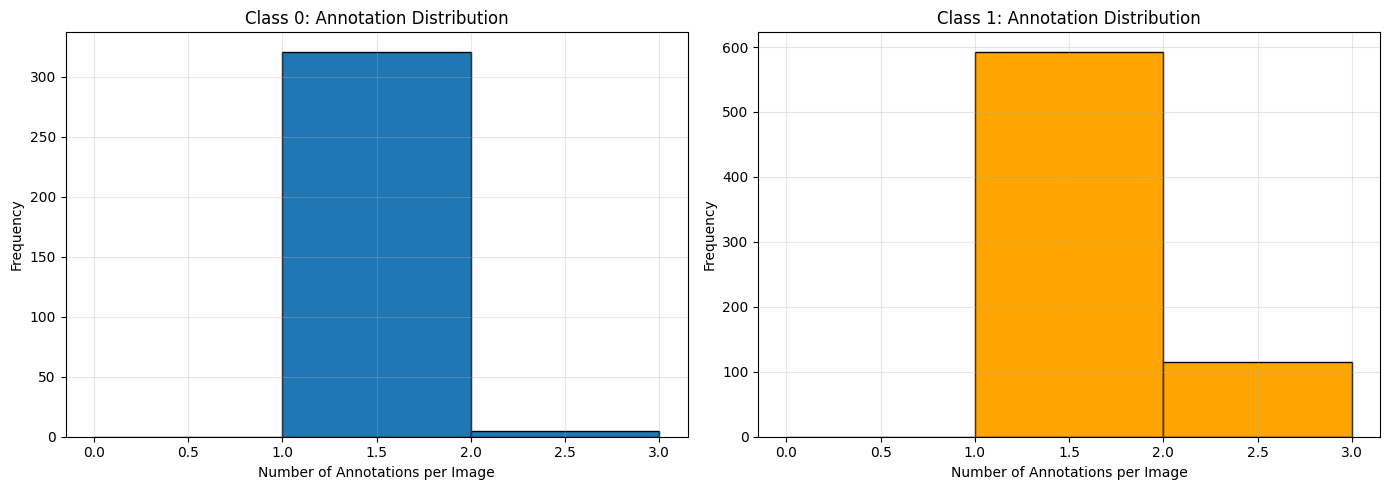

In [12]:
# Plot annotation distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Class 0 distribution
ax1.hist(annotation_counts_0, bins=range(max(annotation_counts_0) + 2), edgecolor='black')
ax1.set_xlabel('Number of Annotations per Image')
ax1.set_ylabel('Frequency')
ax1.set_title('Class 0: Annotation Distribution')
ax1.grid(True, alpha=0.3)

# Class 1 distribution
ax2.hist(annotation_counts_1, bins=range(max(annotation_counts_1) + 2), edgecolor='black', color='orange')
ax2.set_xlabel('Number of Annotations per Image')
ax2.set_ylabel('Frequency')
ax2.set_title('Class 1: Annotation Distribution')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Summary

This notebook explored:
1. QR code dataset structure and samples
2. Barcode dataset with YOLO annotations
3. Annotation statistics and distribution
4. Visual samples with bounding boxes

Next steps:
- Implement QR code detection and decoding
- Implement barcode detection and decoding
- Build unified pipeline